In [244]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import umap
from sklearn.decomposition import PCA
from prince import MCA 


In [3]:
path = '/home/ibotcazou/Bureau/Master_data_science/DATAS_M2/Data_visualisation/Projet_umap_acp/data_projet_dataviz'
os.listdir(path)

['squash-stored.csv',
 'contact-lenses.csv',
 'pasture.csv',
 'bondrate.csv',
 'newthyroid.csv',
 'car.csv']

In [103]:
#Nous avons utilisé une version des datasets regroupés. 

squash_stored = pd.read_csv(path+'/squash-stored.csv',header=None,sep=' ')
contact_lenses = pd.read_csv(path+'/contact-lenses.csv',header=None,sep=' ')
pasture = pd.read_csv(path+'/pasture.csv',header=None,sep=' ')
bondrate = pd.read_csv(path+'/bondrate.csv',header=None,sep=' ')
newthyroid = pd.read_csv(path+'/newthyroid.csv',header=None,sep=' ')
car = pd.read_csv(path+'/car.csv',header=None,sep=' ')
%matplotlib inline

# Configurez Pandas pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)

Nous avons fait un test des valeurs manquantes sur chacun des dataframes avec la commande: 

car.isna().sum()

# Squash stored

In [117]:
squash_stored.shape

(52, 52)

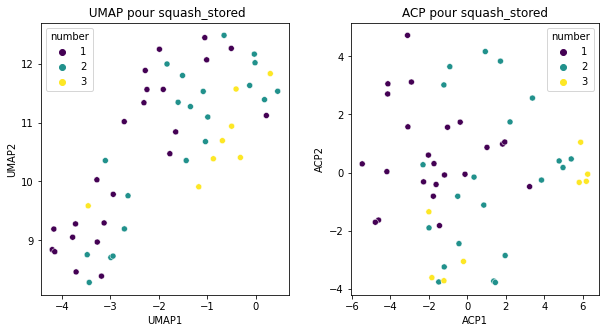

In [267]:
# Prendre que les variables numériques et non catégorielles
X = squash_stored.iloc[:,30:-1]
Y = squash_stored.iloc[:,-1]

#ACP

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
A = (X - mean) / std

acp = PCA(n_components=2)
X_acp =acp.fit_transform(A)

#UMAP
reducer = umap.UMAP(init=X_acp,n_neighbors=25, min_dist=0.02, n_components=2)
embedding = reducer.fit_transform(X)




# Création d'un DataFrame pour la visualisation
df = pd.DataFrame({'UMAP1': embedding[:, 0], 'UMAP2': embedding[:, 1], 'number': Y})
df1 = pd.DataFrame({'ACP1': X_acp[:, 0], 'ACP2': X_acp[:, 1], 'number': Y})

# Visualisation des données réduites avec UMAP
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='number', data=df, palette='viridis')
plt.title(' UMAP pour squash_stored')

plt.subplot(1,2,2)
sns.scatterplot(x='ACP1', y='ACP2', hue='number', data=df1, palette='viridis')
plt.title('ACP pour squash_stored')

# Ajustez les marges entre les sous-graphiques (utilisez les paramètres wspace et hspace)
plt.subplots_adjust(wspace=0.25)  # Ajustez la largeur entre les sous-graphiques

plt.show()

# contact_lenses

In [139]:
contact_lenses.head()

,0,1,2,3,4,5,6
0,0.0,1.0,0.0,0.0,0.0,0.0,1
1,0.0,1.0,0.0,1.0,1.0,1.0,1
2,0.0,1.0,0.0,0.0,1.0,0.0,1
3,0.0,0.0,1.0,1.0,0.0,0.0,1
4,1.0,0.0,0.0,0.0,0.0,1.0,2


contact_lenses est un dataset avec que des variables catégorielles, l'ACP et UMAP ne sont pas des méthodes adaptées à ce genres de données. Une ACM serait plus adaptée.  

# pasture

In [268]:
pasture.shape

(36, 26)

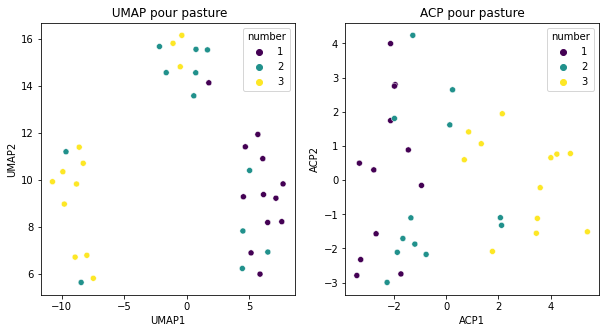

In [278]:
# Prendre que les variables numériques et non catégorielles
X = pd.concat((pasture.iloc[:,4:16],pasture.iloc[:,17:-1]),axis=1)
Y = pasture.iloc[:,-1]

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
A = (X - mean) / std

#ACP
acp = PCA(n_components=2)
X_acp =acp.fit_transform(A)

#UMAP
reducer = umap.UMAP(n_neighbors=5, min_dist=1, n_components=2,init=X_acp)
embedding = reducer.fit_transform(X)




# Création d'un DataFrame pour la visualisation
df = pd.DataFrame({'UMAP1': embedding[:, 0], 'UMAP2': embedding[:, 1], 'number': Y})
df1 = pd.DataFrame({'ACP1': X_acp[:, 0], 'ACP2': X_acp[:, 1], 'number': Y})

# Visualisation des données réduites avec UMAP
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='number', data=df, palette='viridis')
plt.title(' UMAP pour pasture')

plt.subplot(1,2,2)
sns.scatterplot(x='ACP1', y='ACP2', hue='number', data=df1, palette='viridis')
plt.title('ACP pour pasture')

# Ajustez les marges entre les sous-graphiques (utilisez les paramètres wspace et hspace)
plt.subplots_adjust(wspace=0.2)  # Ajustez la largeur entre les sous-graphiques

plt.show()

# bondrate

In [282]:
bondrate.shape

(57, 38)

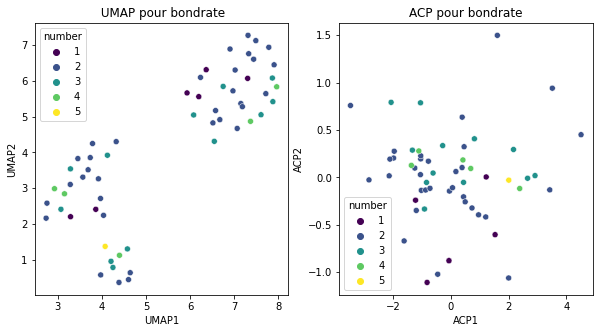

In [286]:
# Prendre que les variables numériques et non catégorielles
X = bondrate.iloc[:,1:4]
Y = bondrate.iloc[:,-1]

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
A = (X - mean) / std


#ACP
acp = PCA(n_components=2)
X_acp =acp.fit_transform(A)


#UMAP
reducer = umap.UMAP(n_neighbors=25, min_dist=0.1, n_components=2,init=X_acp)
embedding = reducer.fit_transform(X)




# Création d'un DataFrame pour la visualisation
df = pd.DataFrame({'UMAP1': embedding[:, 0], 'UMAP2': embedding[:, 1], 'number': Y})
df1 = pd.DataFrame({'ACP1': X_acp[:, 0], 'ACP2': X_acp[:, 1], 'number': Y})

# Visualisation des données réduites avec UMAP
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='number', data=df, palette='viridis')
plt.title(' UMAP pour bondrate')

plt.subplot(1,2,2)
sns.scatterplot(x='ACP1', y='ACP2', hue='number', data=df1, palette='viridis')
plt.title('ACP pour bondrate')

# Ajustez les marges entre les sous-graphiques (utilisez les paramètres wspace et hspace)
plt.subplots_adjust(wspace=0.2)  # Ajustez la largeur entre les sous-graphiques

plt.show()

# newthyroid

In [287]:
newthyroid.shape

(215, 6)

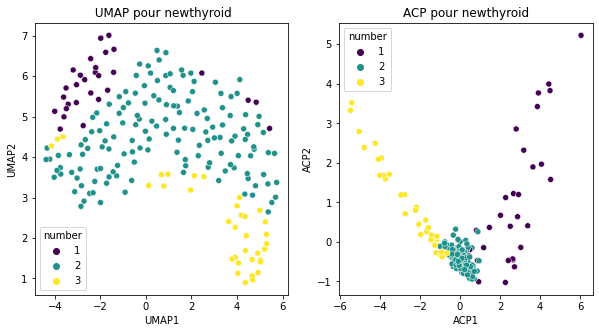

In [295]:
# Prendre que les variables numériques et non catégorielles
X = newthyroid.iloc[:,:-1]
Y = newthyroid.iloc[:,-1]

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
A = (X - mean) / std


#ACP
acp = PCA(n_components=2)
X_acp =acp.fit_transform(A)


#UMAP
reducer = umap.UMAP(n_neighbors=100, min_dist=0.5, n_components=2,init=X_acp)
embedding = reducer.fit_transform(X)




# Création d'un DataFrame pour la visualisation
df = pd.DataFrame({'UMAP1': embedding[:, 0], 'UMAP2': embedding[:, 1], 'number': Y})
df1 = pd.DataFrame({'ACP1': X_acp[:, 0], 'ACP2': X_acp[:, 1], 'number': Y})

# Visualisation des données réduites avec UMAP
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='number', data=df, palette='viridis')
plt.title(' UMAP pour newthyroid')

plt.subplot(1,2,2)
sns.scatterplot(x='ACP1', y='ACP2', hue='number', data=df1, palette='viridis')
plt.title('ACP pour newthyroid')

# Ajustez les marges entre les sous-graphiques (utilisez les paramètres wspace et hspace)
plt.subplots_adjust(wspace=0.2)  # Ajustez la largeur entre les sous-graphiques

plt.show()

# car

In [236]:
car

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4
1724,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,4
1725,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,4
1726,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,4


car est un dataset avec que des variables catégorielles, l'ACP et UMAP ne sont pas des méthodes adaptées à ce genres de données. Une ACM serait plus adaptée.  

## ACM

In [304]:

X = car.iloc[:,:-1]
Y = car.iloc[:,-1]

# Créez une instance de l'Analyse des Correspondances Multiples (MCA)
mca = MCA(n_components=10)

# Ajustez le modèle MCA aux données catégorielles
mca_reduce = mca.fit_transform(X)
mca_reduce = np.array(mca_reduce)

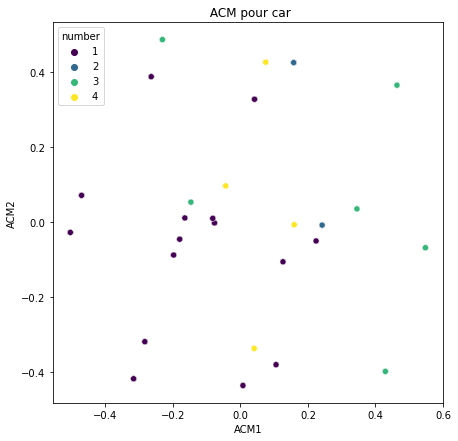

In [309]:

# Création d'un DataFrame pour la visualisation
df = pd.DataFrame({'ACM1': mca_reduce[:,0], 'ACM2': mca_reduce[:,1], 'number': Y})


# Visualisation des données réduites avec MCA
plt.figure(figsize=(7, 7))
sns.scatterplot(x='ACM1', y='ACM2', hue='number', data=df, palette='viridis')
plt.title(' ACM pour car')

plt.show()

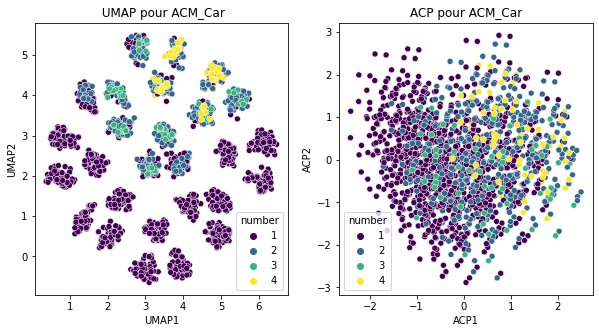

In [318]:

# Prendre que les variables numériques et non catégorielles
X = mca_reduce

mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
A = (X - mean) / std


#ACP
acp = PCA(n_components=2)
X_acp =acp.fit_transform(A)


#UMAP
reducer = umap.UMAP(n_neighbors=600, min_dist=0.1, n_components=2,init=X_acp)
embedding = reducer.fit_transform(X)




# Création d'un DataFrame pour la visualisation
df = pd.DataFrame({'UMAP1': embedding[:, 0], 'UMAP2': embedding[:, 1], 'number': Y})
df1 = pd.DataFrame({'ACP1': X_acp[:, 0], 'ACP2': X_acp[:, 1], 'number': Y})

# Visualisation des données réduites avec UMAP
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
sns.scatterplot(x='UMAP1', y='UMAP2', hue='number', data=df, palette='viridis')
plt.title(' UMAP pour ACM_Car')

plt.subplot(1,2,2)
sns.scatterplot(x='ACP1', y='ACP2', hue='number', data=df1, palette='viridis')
plt.title('ACP pour ACM_Car')

# Ajustez les marges entre les sous-graphiques (utilisez les paramètres wspace et hspace)
plt.subplots_adjust(wspace=0.2)  # Ajustez la largeur entre les sous-graphiques

plt.show()